In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r'D:\spam.csv', encoding='ISO-8859-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3271,ham,"MOON has come to color your dreams, STARS to m...",NaN,NaN,NaN
4765,ham,Whens your radio show?,NaN,NaN,NaN
1900,ham,And miss vday the parachute and double coins??...,NaN,NaN,NaN
4643,ham,Did u got that persons story,NaN,NaN,NaN
4366,ham,I like dis sweater fr mango but no more my siz...,NaN,NaN,NaN
1514,ham,K:)all the best:)congrats...,NaN,NaN,NaN
5539,ham,Just sleeping..and surfing,NaN,NaN,NaN
1434,ham,I asked sen to come chennai and search for job.,NaN,NaN,NaN
173,ham,"Bloody hell, cant believe you forgot my surnam...",NaN,NaN,NaN
1465,spam,YOU 07801543489 are guaranteed the latests Nok...,NaN,NaN,NaN


In [6]:
data.shape

(5572, 5)

In [7]:
## 1. Data Cleaning 
## 2. EDA
## 3. Text Preprocession 
## 4. Model Building 
## Evaluationg
# improvement 
## website 
## deploy 

In [8]:
# Data Cleaning 


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# dropping the last 3 columns because it is not worth it to addded 

In [11]:
data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [12]:
data.sample(5)

,v1,v2
4318,ham,Are you still playing with gautham?
472,ham,Nothing. I meant that once the money enters yo...
2125,ham,"Sorry im getting up now, feel really bad- tota..."
1374,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA..."
941,ham,Theyre doing it to lots of places. Only hospit...


In [13]:
## rename the v1 and v2 

In [14]:
data.rename(columns={"v1": "target", "v2": "text"}, inplace=True)

In [15]:
data.sample(5)

,target,text
814,spam,U were outbid by simonwatson5120 on the Shinco...
152,ham,Ok... Ur typical reply...
148,ham,K..i deleted my contact that why?
2802,spam,FreeMsg>FAV XMAS TONES!Reply REAL
4375,spam,"If you don't, your prize will go to another cu..."


In [16]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

In [17]:
data['target'] = encoder.fit_transform(data['target'])

In [18]:
data.sample(10)

,target,text
237,0,Where are you?when wil you reach here?
412,0,Okies... I'll go yan jiu too... We can skip ar...
667,0,This pay is &lt;DECIMAL&gt; lakhs:)
1787,0,Yes:)sura in sun tv.:)lol.
4054,0,When is school starting. Where will you stay. ...
2281,0,"I hav almost reached. Call, i m unable to conn..."
1461,0,Kinda. First one gets in at twelve! Aah. Speak...
234,1,Text & meet someone sexy today. U can find a d...
2247,1,Back 2 work 2morro half term over! Can U C me ...
4045,1,Win a å£1000 cash prize or a prize worth å£5000


In [19]:
data.isnull() 
## no null value contains here 

,target,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [20]:
## missing value: no missing value contains here 
data.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
## check for duplicated value

In [22]:
data.duplicated().sum()
## 403 duplicated value contains in the data set 

403

In [23]:
## removing the duplicated value 

In [24]:
data = data.drop_duplicates(keep='first')

In [25]:
data.duplicated().sum()

0

In [26]:
data.shape

(5169, 2)

In [27]:
## 2. EDA

In [28]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

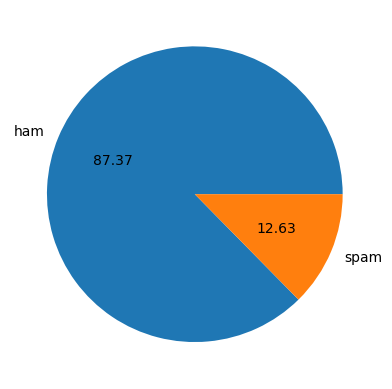

In [30]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [31]:
## This piechart tells us data is impblance 

In [32]:
import nltk

In [33]:
!pip install nltk

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
data['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [36]:
data['num_characteres'] = data['text'].apply(len)
## this length gives us the characters


In [37]:
data.head()

,target,text,num_characteres
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
## num of words

# data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [39]:
data.head()

,target,text,num_characteres,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [40]:
data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [41]:
data.head()

,target,text,num_characteres,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
data[['num_sentences', 'num_words', 'num_characteres']].describe()

## descibe data for ham and spam both

,num_sentences,num_words,num_characteres
count,5169.000000,5169.000000,5169.000000
mean,1.965564,18.455794,78.977945
std,1.448541,13.324758,58.236293
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,60.000000
75%,2.000000,26.000000,117.000000
max,38.000000,220.000000,910.000000


In [43]:
## describe message for ham message

data[data['target'] == 0][['num_sentences', 'num_words', 'num_characteres']].describe()

,num_sentences,num_words,num_characteres
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,70.459256
std,1.383657,13.493970,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


In [44]:
## describe message for spam messages

data[data['target'] == 1][['num_sentences', 'num_words', 'num_characteres']].describe()

,num_sentences,num_words,num_characteres
count,653.000000,653.000000,653.000000
mean,2.970904,27.667688,137.891271
std,1.488425,7.008418,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,224.000000


In [45]:
## 0 stand for ham and 1 stand for spam 

In [46]:
import seaborn as sns

<Axes: xlabel='num_characteres', ylabel='Count'>

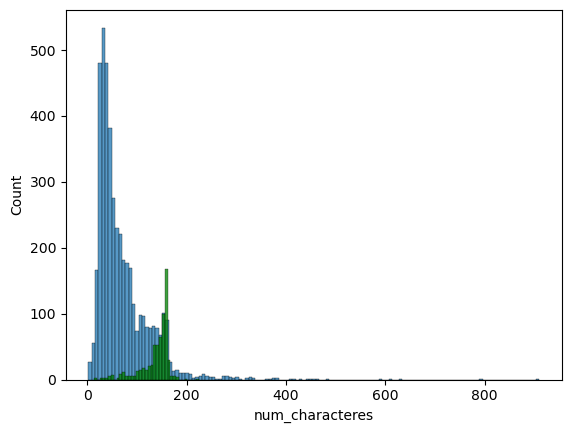

In [47]:
sns.histplot(data[data['target'] == 0] ['num_characteres'])
sns.histplot(data[data['target'] == 1] ['num_characteres'], color='green')

<Axes: xlabel='num_words', ylabel='Count'>

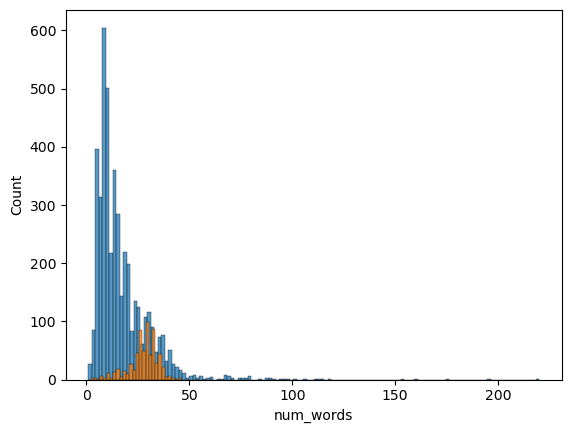

In [48]:
sns.histplot(data[data['target'] == 0] ['num_words'])
sns.histplot(data[data['target'] == 1] ['num_words'])

<Axes: xlabel='num_sentences', ylabel='Count'>

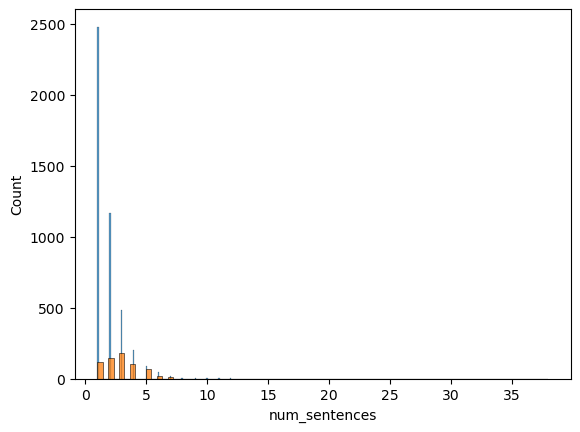

In [49]:
sns.histplot(data[data['target'] == 0] ['num_sentences'])
sns.histplot(data[data['target'] == 1] ['num_sentences'])

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


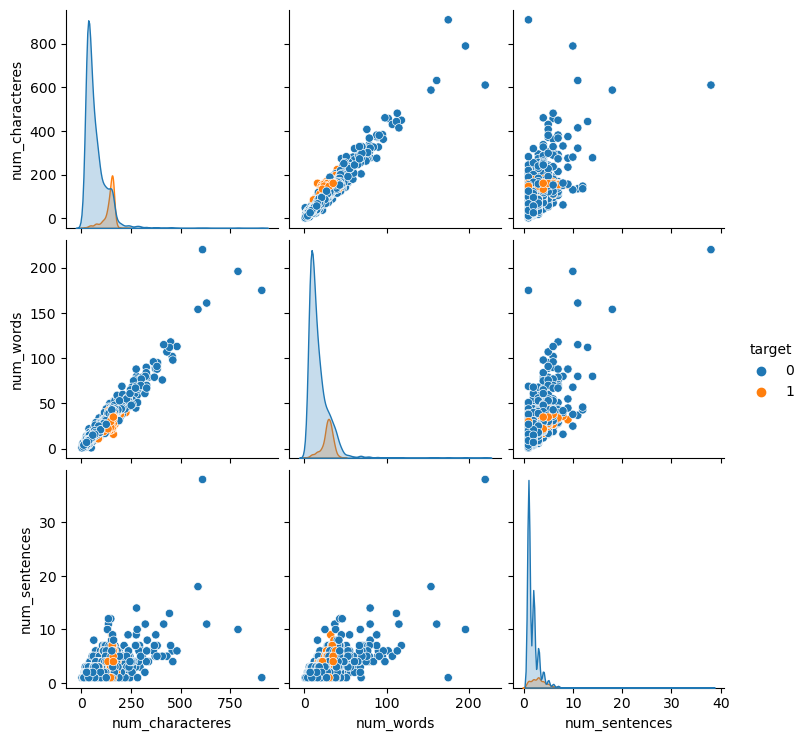

In [50]:
sns.pairplot(data,hue='target')

## this pairploting tell us data will contains a outliers
# we have to remove this outlier other wise it will cause error in accuracy

In [51]:
# Ensure only numeric columns are included in correlation calculation
numeric_data = data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


                   target  num_characteres  num_words  num_sentences
target           1.000000         0.384717   0.262912       0.263939
num_characteres  0.384717         1.000000   0.965760       0.624139
num_words        0.262912         0.965760   1.000000       0.679971
num_sentences    0.263939         0.624139   0.679971       1.000000


In [52]:
print(data.dtypes)


target              int32
text               object
num_characteres     int64
num_words           int64
num_sentences       int64
dtype: object


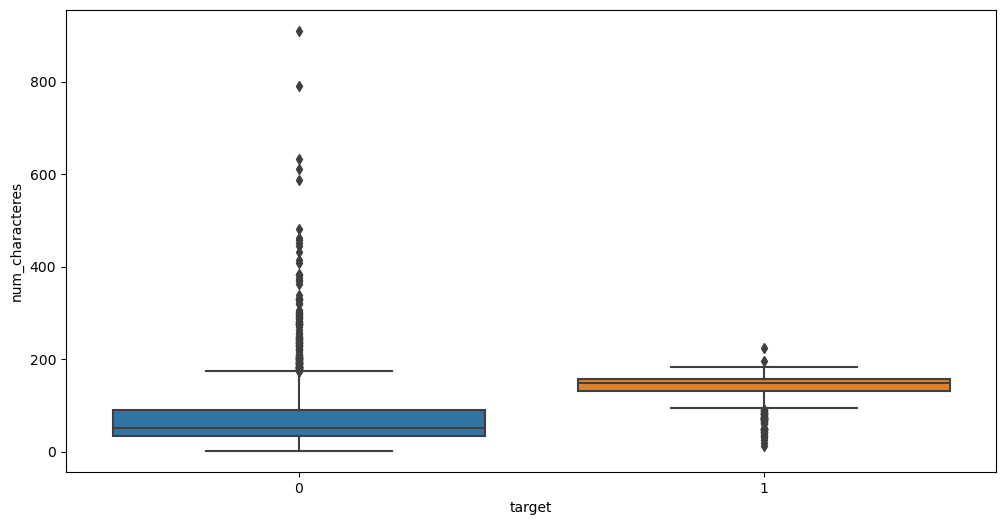

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='num_characteres', data=data)
plt.show()


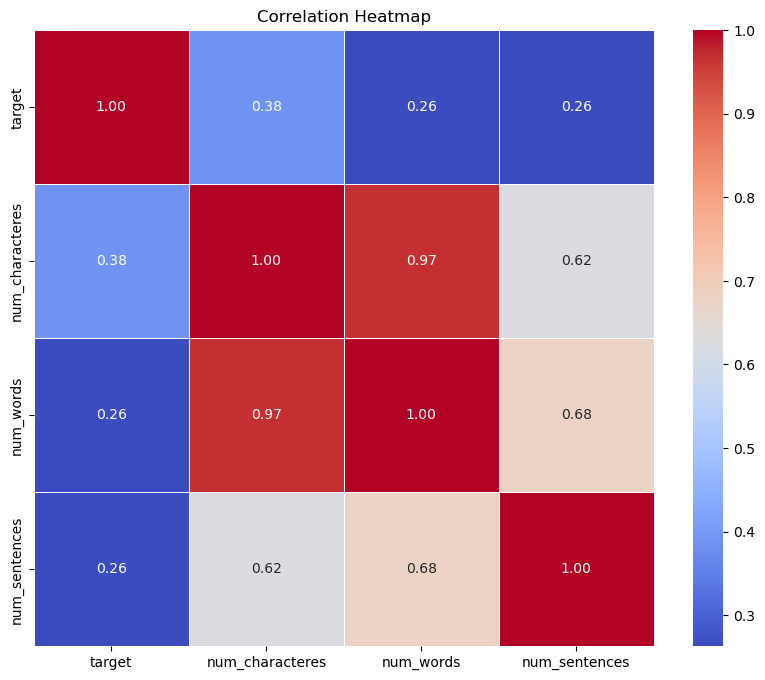

In [54]:
# Plotting Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [55]:
# step2: Data Preprocessing 
# lower case
# Tokenization 
# Removing special characters
# Removing stop words and punctuation 
# Stemming


In [56]:
# Removing stop words and punctuation 
## Stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')  ## stop word is useses for words fromation this do not have a difference meaning.\



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("Dancing")

'danc'

In [58]:
## What is Puncuation in english 
import string
string.punctuation  # this is speacil Characters


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
def transform_text(text):
    text = text.lower()   # converting in lower case
    text = nltk.word_tokenize(text) # convert in the token
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:] # cloning the y
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear() 
     
    for i in text:
            y.append(ps.stem(i))
    return "  ".join(y)
#     return text;

In [60]:
transform_text("HELLO UNIVERSE LOVEing 100% @Pri YOU how are *&!^*&%&*#")

'hello  univers  love  100  pri'

In [61]:
data['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [62]:
data['transform_text']   = data['text'].apply(transform_text) 

In [63]:
data.head()

,target,text,num_characteres,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [64]:
!pip install wordcloud


In [65]:
## Making a world cloud 
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=1000, min_font_size = 10, background_color = 'white')

In [66]:
spam_wc = wc.generate(data[data['target'] == 1]['transform_text'].str.cat(sep=" "))

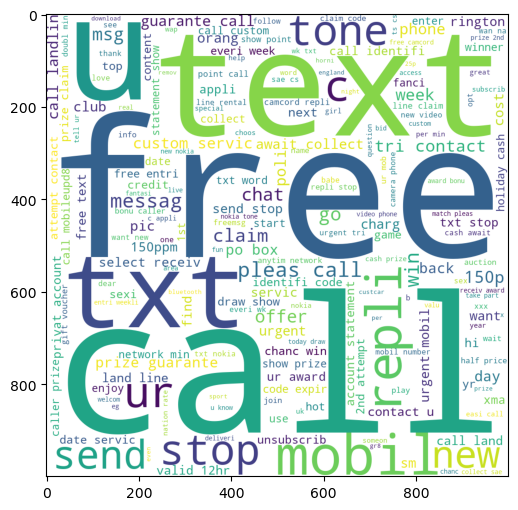

In [67]:
plt.figure(figsize=(20,6))
plt.imshow(spam_wc)

In [68]:
ham_wc = wc.generate(data[data['target'] == 0]['transform_text'].str.cat(sep=" "))


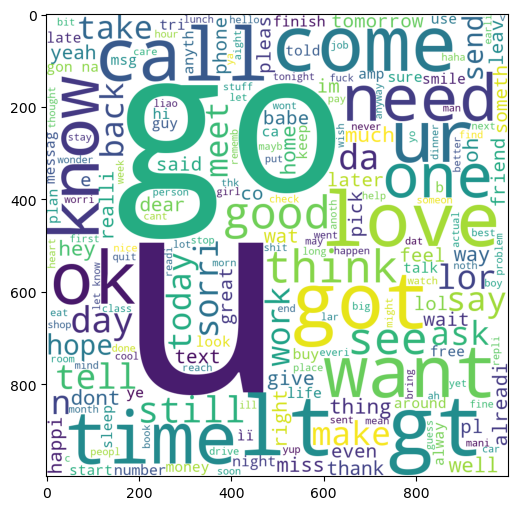

In [69]:
plt.figure(figsize=(20,6))
plt.imshow(ham_wc)

In [70]:
data.head()

,target,text,num_characteres,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [71]:
## Taking top 50 words from the spam and top 50 word from the ham 

In [72]:
spam_corpus = []

for msg in data[data['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
#     print(msg)

In [73]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [74]:
len(spam_corpus)

9939

In [75]:
from collections import Counter
# Counter(spam_corpus).most_common(50)

In [76]:
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

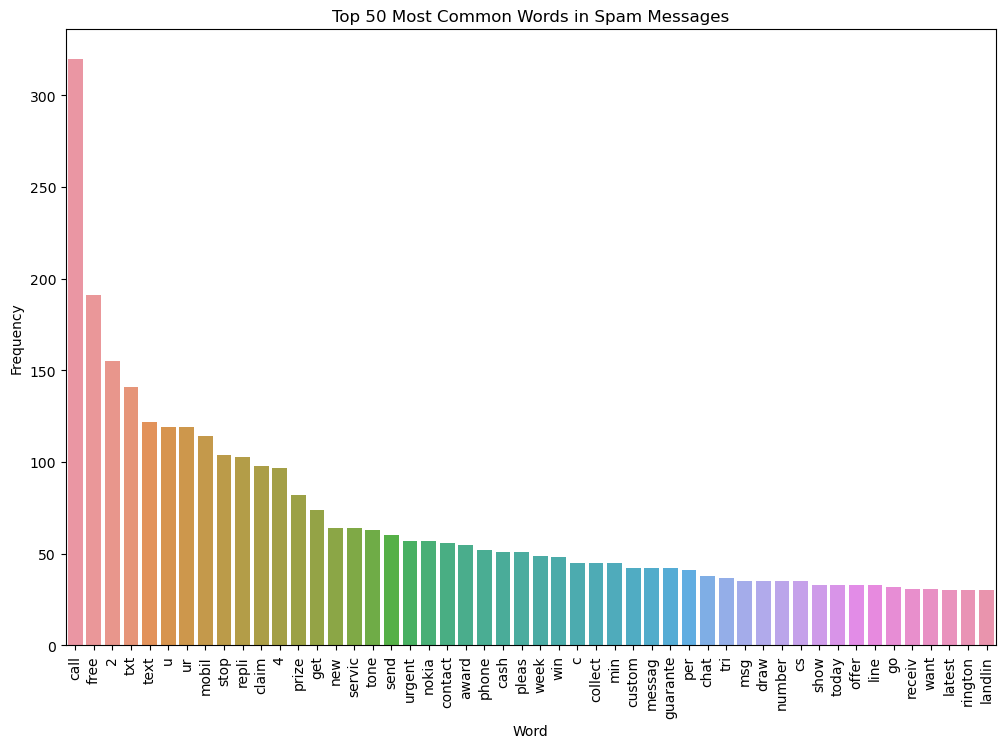

In [77]:
word_counts = Counter(spam_corpus).most_common(50)

# Create a DataFrame for plotting
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Word', y='Frequency', data=df_word_counts)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Top 50 Most Common Words in Spam Messages')
plt.show()

In [78]:
ham_corpus = []

# Populate the list with words from ham messages
for msg in data[data['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

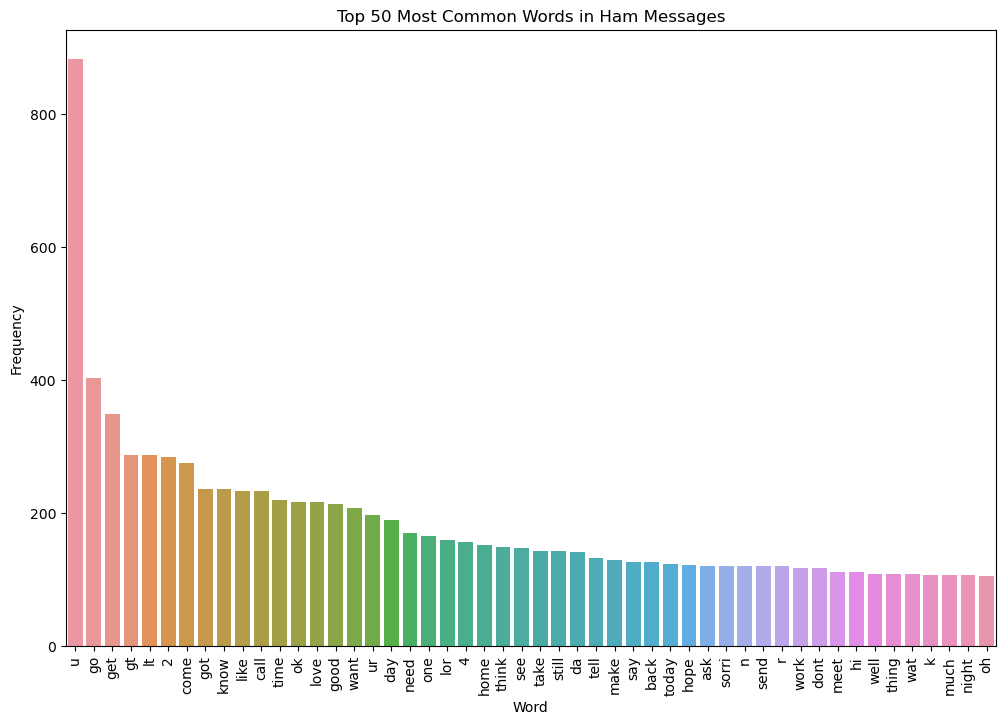

In [79]:
word_counts = Counter(ham_corpus).most_common(50)

# Create a DataFrame for plotting
df_word_counts = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Word', y='Frequency', data=df_word_counts)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Top 50 Most Common Words in Ham Messages')
plt.show()

In [80]:
# 3 Model Building 

# vectorize the data using bag of word 



In [81]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()


In [82]:
X = cv.fit_transform(data['transform_text']).toarray()


In [83]:
X.shape

(5169, 6708)

In [84]:
y = data['target'].values

In [85]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [88]:
## Applying naiveBayes Algorithm 


In [89]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [90]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [91]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score is ", accuracy_score(y_test, y_pred1))
print("Confusion martrix is",confusion_matrix(y_test, y_pred1))
print("Precision score is",precision_score(y_test, y_pred1))

Accuracy Score is  0.8800773694390716
Confusion martrix is [[792 104]
 [ 20 118]]
Precision score is 0.5315315315315315


In [92]:
print("MultinomialNB NaiveBayes")
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score is ", accuracy_score(y_test, y_pred2))
print("Confusion martrix is",confusion_matrix(y_test, y_pred2))
print("Precision score is",precision_score(y_test, y_pred2))

MultinomialNB NaiveBayes
Accuracy Score is  0.9642166344294004
Confusion martrix is [[871  25]
 [ 12 126]]
Precision score is 0.8344370860927153


In [93]:
print("BernoulliNB NaiveBayes")
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score is ", accuracy_score(y_test, y_pred3))
print("Confusion martrix is",confusion_matrix(y_test, y_pred3))
print("Precision score is",precision_score(y_test, y_pred3))

BernoulliNB NaiveBayes
Accuracy Score is  0.9700193423597679
Confusion martrix is [[893   3]
 [ 28 110]]
Precision score is 0.9734513274336283


In [94]:
## In the dataSet accuracy not matter that much but Precision Score matter a lot 
## coz this is IMBALANCE DATA

# in three of those BernoulliNB giving the best precison and accuracy score 

In [95]:
## Using another method which is TfidVectorizer

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [97]:
X = tfidf.fit_transform(data['transform_text']).toarray()

In [98]:
X.shape

(5169, 6708)

In [99]:
y = data['target'].values

In [100]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [103]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [104]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [105]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score is ", accuracy_score(y_test, y_pred1))
print("Confusion martrix is",confusion_matrix(y_test, y_pred1))
print("Precision score is",precision_score(y_test, y_pred1))

Accuracy Score is  0.8762088974854932
Confusion martrix is [[793 103]
 [ 25 113]]
Precision score is 0.5231481481481481


In [106]:
print("MultinomialNB NaiveBayes")
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score is ", accuracy_score(y_test, y_pred2))
print("Confusion martrix is",confusion_matrix(y_test, y_pred2))
print("Precision score is",precision_score(y_test, y_pred2))

MultinomialNB NaiveBayes
Accuracy Score is  0.9593810444874274
Confusion martrix is [[896   0]
 [ 42  96]]
Precision score is 1.0


In [107]:
print("BernoulliNB NaiveBayes")
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score is ", accuracy_score(y_test, y_pred3))
print("Confusion martrix is",confusion_matrix(y_test, y_pred3))
print("Precision score is",precision_score(y_test, y_pred3))

BernoulliNB NaiveBayes
Accuracy Score is  0.9700193423597679
Confusion martrix is [[893   3]
 [ 28 110]]
Precision score is 0.9734513274336283


In [108]:
## Now after careful considration we going with TfidfVectorizer instead of CountVectorizer()

# MultinomialNB NaiveBayes -> TfidfVectorizer coz this gives us 100% precison 

In [109]:
## Apply multiple model so we can check and compare the accuracy 

In [110]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier


In [112]:
# Classifier initialization
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [113]:
clfs = {
    "SVC" : svc,
    "KN" : knc,
    "NB" : mnb,
    "DT" : dtc,
    "LR" : rfc,
    "AdaBoost" : abc,
    "BgC" : bc,
    "ETC" : etc,
    "GBDT" : gbdt,
    "xgb" : xgb,
}

In [114]:
# creating a function 
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision


In [123]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [125]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For", name)
    print("Accuracy : " , current_accuracy)
    print("Precision : ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

# print("love")    
    
    
# accuracy_scores = []
# precision_scores = []

# for name, clf in clfs.items():
#     current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
#     print("For", name)
#     print("Accuracy : ", current_accuracy)
#     print("Precision : ", current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

For SVC
Accuracy :  0.9729206963249516
Precision :  0.9741379310344828
For KN
Accuracy :  0.9003868471953579
Precision :  1.0
For NB
Accuracy :  0.9593810444874274
Precision :  1.0
For DT
Accuracy :  0.9352030947775629
Precision :  0.8380952380952381
For LR
Accuracy :  0.971953578336557
Precision :  1.0
For AdaBoost
Accuracy :  0.9613152804642167
Precision :  0.9454545454545454
For BgC
Accuracy :  0.9584139264990329
Precision :  0.8625954198473282
For ETC
Accuracy :  0.9729206963249516
Precision :  0.9824561403508771
For GBDT
Accuracy :  0.9526112185686654
Precision :  0.9238095238095239
For xgb
Accuracy :  0.9729206963249516
Precision :  0.9435483870967742
love


In [126]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)




# # Create DataFrame
# performance_df = pd.DataFrame({
#     'Algorithm': list(clfs.keys()),
#     'Accuracy': accuracy_scores,
#     'Precision': precision_scores
# }).sort_values('Precision', ascending=False)

In [127]:
performance_df
# Melt the DataFrame
# performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
4,LR,0.971954,1.000000
7,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
5,AdaBoost,0.961315,0.945455
9,xgb,0.972921,0.943548
8,GBDT,0.952611,0.923810
6,BgC,0.958414,0.862595
3,DT,0.935203,0.838095


In [129]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
# Plotting
# sns.catplot(x="Algorithm", y="value", hue="variable", data=performance_df1, kind='bar', height=5)
# plt.ylim(0.5, 1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [130]:
performance_df1 

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,LR,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,GBDT,Accuracy,0.952611
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.935203


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


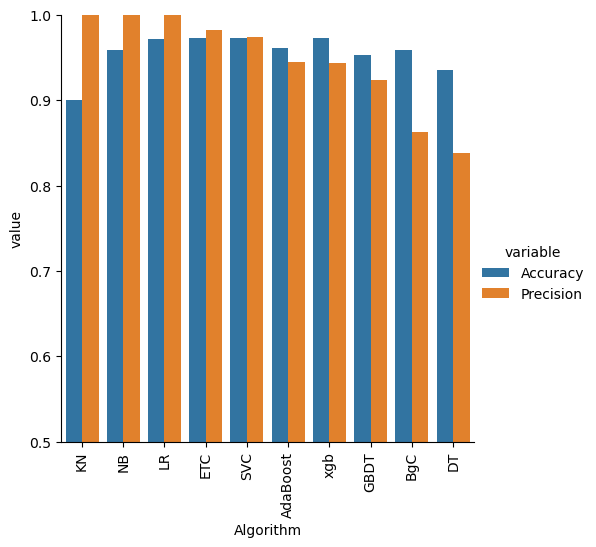

In [131]:
sns.catplot(x = "Algorithm", y = "value", hue = "variable", data=performance_df1,
           kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
## Naive bayes give the best precision we go with this 

In [ ]:
## Improving model Performance 

In [132]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))


# # Pickle the tfidf and mnb models
# pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
# pickle.dump(mnb, open('model.pkl', 'wb'))


In [133]:
print("Done")

Done
